In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("data/BATADAL_dataset03.csv")
valid_data = pd.read_csv("data/BATADAL_dataset04.csv")
test_data = pd.read_csv("data/BATADAL_test_dataset.csv")

In [3]:
train_data["DATETIME"] = pd.to_datetime(train_data.DATETIME)
valid_data["DATETIME"] = pd.to_datetime(valid_data.DATETIME)
test_data["DATETIME"] = pd.to_datetime(test_data.DATETIME)

In [4]:
# remove leading space in the columns
valid_data.columns = valid_data.columns.str.strip()

In [5]:
X_train = train_data[set(train_data.columns)-{"ATT_FLAG", "DATETIME"}].to_numpy()
X_valid = valid_data[set(valid_data.columns)-{"ATT_FLAG", "DATETIME"}].to_numpy()
y_valid = valid_data["ATT_FLAG"].to_numpy()
# convert to 1s for attack and 0s for normal
y_valid = y_valid == 1
# X_test = test_data[set(test_data.columns)-{"ATT_FLAG"}]
# y_test = test_data["ATT_FLAG"]

In [20]:
len(cols)

43

/Users/nikilsaldanaha/Documents/University/q4/Cyber Data Analytics/project/cyber-data-analytics/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:414: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0
/Users/nikilsaldanaha/Documents/University/q4/Cyber Data Analytics/project/cyber-data-analytics/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:414: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0
/Users/nikilsaldanaha/Documents/University/q4/Cyber Data Analytics/project/cyber-data-analytics/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:414: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0
/Users/nikilsaldanaha/Documents/University/q4/Cyber Data Analytics/project/cyber-data

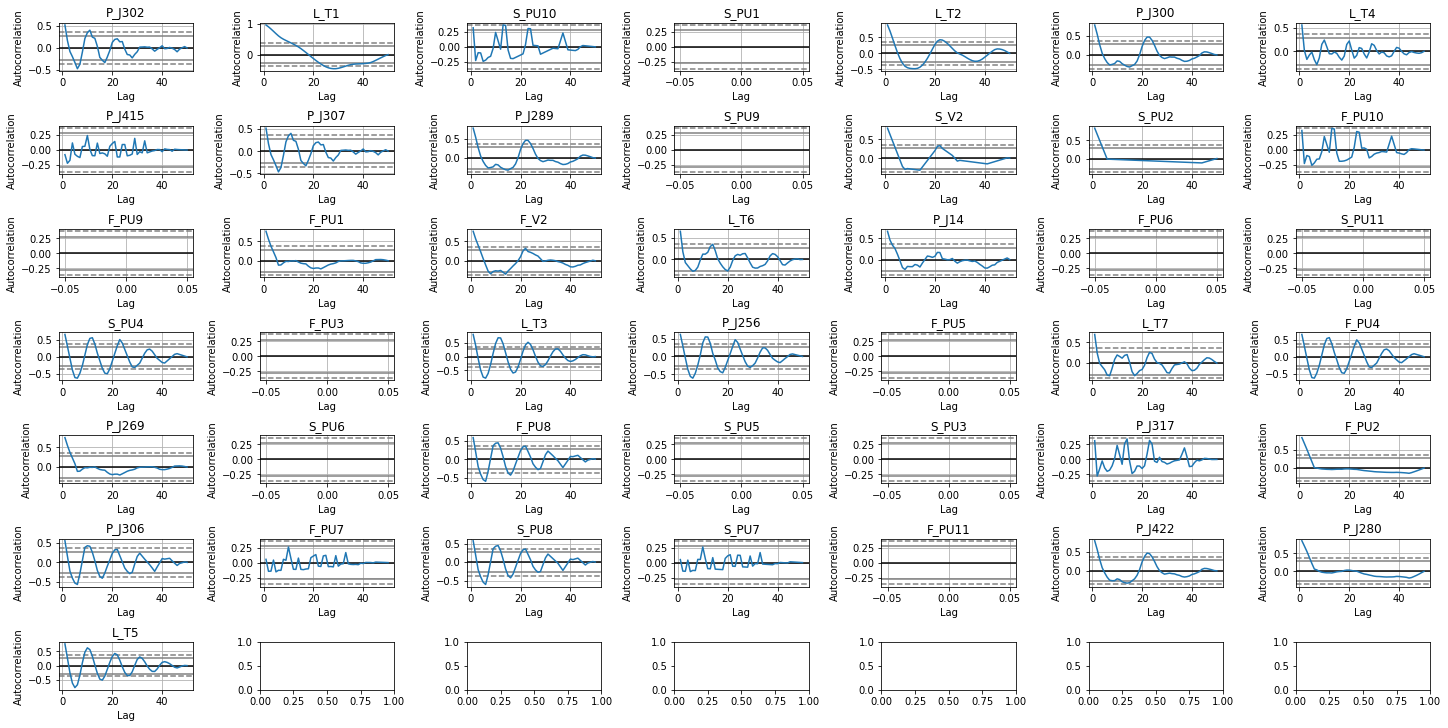

In [33]:
cols = list(set(train_data.columns)-{"ATT_FLAG", "DATETIME"})
fig, axs = plt.subplots(7,7, constrained_layout=True)
fig.set_size_inches((20,10))
for i, col in enumerate(cols):
    a = int(i/7)
    b = int(i%7)
    pd.plotting.autocorrelation_plot(train_data[col].head(50), ax=axs[a, b])
    axs[a, b].set_title(col)
    axs[a, b].set_ylabel("Autocorrelation")
    axs[a, b].set_xlabel("Lag")
plt.show()